# ECEN 489 Python Exercise 3
## Brandon Thayer, Spring 2019

In [1]:
# Imports and configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Avoid truncation when using 'describe'
pd.set_option('display.max_columns', None)

# Set figure size for plotting.
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
########################################################################
# Helper function for training and predicting.
########################################################################


def train_predict(model, x_train, y_train, x_test, y_test, c_str):
    """Helper for performing training and predictions.

    :param model: Initialized classifier. E.g. GaussianNb()
    :param x_train: Training data.
    :param y_train: Training labels.
    :param x_test: Testing data.
    :param y_test: Testing labels.
    :param c_str: String for classifier. E.g. "Naive Bayes"
    :returns: confusion matrix and F1 score.
    """
    # Train the model.
    model.fit(x_train, y_train)

    # Predict.
    y_pred = model.predict(x_test)

    # Generate confusion matrix.
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

    # Compute F1 score.
    f1 = f1_score(y_true=y_test, y_pred=y_pred)

    # Display.
    print('*' * 80)
    print(c_str)
    print('Confusion matrix:')
    print(cm)
    print('F1 score for testing data: {:.4f}'.format(f1))
    print('Training accuracy: {:.4f}'.format(model.score(x_train, y_train)))
    print('Testing accuracy: {:.4f}'.format(model.score(x_test, y_test)))
    print('*' * 80)

    return cm, f1


## Step 1) Load and Examine Data

In [3]:
df = pd.read_csv('ecen489py3data.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26947 entries, 0 to 26946
Data columns (total 27 columns):
Feature00    23759 non-null float64
Feature01    24288 non-null float64
Feature02    6395 non-null float64
Feature03    6565 non-null float64
Feature04    26947 non-null object
Feature05    3115 non-null float64
Feature06    3201 non-null float64
Feature07    3197 non-null float64
Feature08    3201 non-null float64
Feature09    3362 non-null float64
Feature10    3362 non-null float64
Feature11    3362 non-null float64
Feature12    3195 non-null float64
Feature13    3197 non-null float64
Feature14    3340 non-null float64
Feature15    3202 non-null float64
Feature16    3202 non-null float64
Feature17    3202 non-null float64
Feature18    3362 non-null float64
Feature19    3362 non-null float64
Feature20    3362 non-null float64
Feature21    3195 non-null float64
Feature22    3202 non-null float64
Feature23    8 non-null float64
Feature24    3202 non-null float64
Feature25    3202

,Feature00,Feature01,Feature02,Feature03,Feature05,Feature06,Feature07,Feature08,Feature09,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Label
count,23759.000000,2.428800e+04,6395.000000,6565.000000,3115.000000,3201.000000,3.197000e+03,3201.000000,3362.000000,3362.000000,3362.000000,3195.000000,3197.000000,3340.000000,3202.000000,3.202000e+03,3202.000000,3362.000000,3362.000000,3362.000000,3195.000000,3202.000000,8.000000,3202.000000,3202.000000,26947.000000
mean,34.764512,3.625664e+05,62.151352,9.116638,8.550284,105.908008,1.887889e+05,0.293488,670.588797,2191.221674,1190.382120,39.753154,3.025138,0.119516,177.615993,8.093276e+04,0.325374,303.498199,1038.740703,569.128142,30.561336,3.231875,0.225650,95.265756,45.823957,0.256912
std,18.641441,5.650321e+07,29.252099,0.521882,0.807067,135.535239,1.067450e+07,0.009112,61.265761,25988.384476,78.180725,2.372065,0.036748,0.059998,27.270181,4.579664e+06,0.005560,65.533392,20340.841285,80.184771,2.594434,0.034437,0.233881,19.246906,5.560062,0.436938
min,14.054714,5.774274e+00,24.440578,7.642299,5.572053,26.645001,7.808669e-02,0.051327,30.602777,58.722225,48.024998,26.568422,2.786466,0.000700,55.760000,5.311932e-02,0.209769,4.551250,0.458333,7.652778,10.361442,3.058215,0.002000,60.245002,0.806450,0.000000
25%,22.085374,8.175224e+00,41.069887,8.737444,8.004584,51.185001,1.784541e-01,0.291138,631.111145,368.847214,1141.388794,38.286371,3.000036,0.096900,165.200007,2.521315e-01,0.322766,276.645828,53.525000,531.201401,28.983149,3.209533,0.012875,87.326252,42.486250,0.000000
50%,28.514414,8.544922e+00,53.998638,9.072266,8.538931,73.570001,1.851615e-01,0.294200,665.131958,645.000000,1186.111084,39.862242,3.021357,0.122100,175.800000,2.568918e-01,0.325444,304.333344,111.694443,570.555542,30.607371,3.226834,0.141350,94.039999,45.735000,0.000000
75%,41.199785,8.931361e+00,74.954861,9.455915,9.096312,117.700001,1.908521e-01,0.296182,702.482620,1098.472260,1233.541626,41.247956,3.050236,0.143100,187.450001,2.615333e-01,0.328006,329.013886,231.819439,607.499939,32.102097,3.252851,0.499800,101.250000,49.188749,1.000000
max,142.268906,8.805803e+09,205.078095,10.906808,11.476805,5482.499953,6.035576e+08,0.309033,1115.416626,567472.250000,1680.277832,62.972978,3.169298,1.499800,740.149990,2.591459e+08,0.341348,2817.500000,555666.687500,3332.500000,48.439015,4.006091,0.499800,566.000002,123.299993,1.000000


## Step 2) Text attributes to numeric attributes

In [4]:
# Code from Prof. Nowka to cast 'object' data types to categorical.
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26947 entries, 0 to 26946
Data columns (total 27 columns):
Feature00    23759 non-null float64
Feature01    24288 non-null float64
Feature02    6395 non-null float64
Feature03    6565 non-null float64
Feature04    26947 non-null int8
Feature05    3115 non-null float64
Feature06    3201 non-null float64
Feature07    3197 non-null float64
Feature08    3201 non-null float64
Feature09    3362 non-null float64
Feature10    3362 non-null float64
Feature11    3362 non-null float64
Feature12    3195 non-null float64
Feature13    3197 non-null float64
Feature14    3340 non-null float64
Feature15    3202 non-null float64
Feature16    3202 non-null float64
Feature17    3202 non-null float64
Feature18    3362 non-null float64
Feature19    3362 non-null float64
Feature20    3362 non-null float64
Feature21    3195 non-null float64
Feature22    3202 non-null float64
Feature23    8 non-null float64
Feature24    3202 non-null float64
Feature25    3202 n

,Feature00,Feature01,Feature02,Feature03,Feature04,Feature05,Feature06,Feature07,Feature08,Feature09,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Label
count,23759.000000,2.428800e+04,6395.000000,6565.000000,26947.000000,3115.000000,3201.000000,3.197000e+03,3201.000000,3362.000000,3362.000000,3362.000000,3195.000000,3197.000000,3340.000000,3202.000000,3.202000e+03,3202.000000,3362.000000,3362.000000,3362.000000,3195.000000,3202.000000,8.000000,3202.000000,3202.000000,26947.000000
mean,34.764512,3.625664e+05,62.151352,9.116638,17.630979,8.550284,105.908008,1.887889e+05,0.293488,670.588797,2191.221674,1190.382120,39.753154,3.025138,0.119516,177.615993,8.093276e+04,0.325374,303.498199,1038.740703,569.128142,30.561336,3.231875,0.225650,95.265756,45.823957,0.256912
std,18.641441,5.650321e+07,29.252099,0.521882,8.933940,0.807067,135.535239,1.067450e+07,0.009112,61.265761,25988.384476,78.180725,2.372065,0.036748,0.059998,27.270181,4.579664e+06,0.005560,65.533392,20340.841285,80.184771,2.594434,0.034437,0.233881,19.246906,5.560062,0.436938
min,14.054714,5.774274e+00,24.440578,7.642299,0.000000,5.572053,26.645001,7.808669e-02,0.051327,30.602777,58.722225,48.024998,26.568422,2.786466,0.000700,55.760000,5.311932e-02,0.209769,4.551250,0.458333,7.652778,10.361442,3.058215,0.002000,60.245002,0.806450,0.000000
25%,22.085374,8.175224e+00,41.069887,8.737444,10.000000,8.004584,51.185001,1.784541e-01,0.291138,631.111145,368.847214,1141.388794,38.286371,3.000036,0.096900,165.200007,2.521315e-01,0.322766,276.645828,53.525000,531.201401,28.983149,3.209533,0.012875,87.326252,42.486250,0.000000
50%,28.514414,8.544922e+00,53.998638,9.072266,22.000000,8.538931,73.570001,1.851615e-01,0.294200,665.131958,645.000000,1186.111084,39.862242,3.021357,0.122100,175.800000,2.568918e-01,0.325444,304.333344,111.694443,570.555542,30.607371,3.226834,0.141350,94.039999,45.735000,0.000000
75%,41.199785,8.931361e+00,74.954861,9.455915,27.000000,9.096312,117.700001,1.908521e-01,0.296182,702.482620,1098.472260,1233.541626,41.247956,3.050236,0.143100,187.450001,2.615333e-01,0.328006,329.013886,231.819439,607.499939,32.102097,3.252851,0.499800,101.250000,49.188749,1.000000
max,142.268906,8.805803e+09,205.078095,10.906808,27.000000,11.476805,5482.499953,6.035576e+08,0.309033,1115.416626,567472.250000,1680.277832,62.972978,3.169298,1.499800,740.149990,2.591459e+08,0.341348,2817.500000,555666.687500,3332.500000,48.439015,4.006091,0.499800,566.000002,123.299993,1.000000


## Step 3) Fix Bad Observations

In [5]:
# Find and drop bad data value.
bad_idx = df["Feature07"].idxmax()
df.drop(bad_idx, inplace=True)

df.describe()

,Feature00,Feature01,Feature02,Feature03,Feature04,Feature05,Feature06,Feature07,Feature08,Feature09,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Label
count,23759.000000,24287.000000,6395.000000,6565.000000,26946.000000,3115.000000,3201.000000,3196.000000,3201.000000,3362.000000,3362.000000,3362.000000,3195.000000,3197.000000,3340.000000,3202.000000,3201.000000,3202.000000,3362.000000,3362.000000,3362.000000,3195.000000,3202.000000,8.000000,3202.000000,3202.000000,26946.000000
mean,34.764512,8.576644,62.151352,9.116638,17.630632,8.550284,105.908008,0.184914,0.293488,670.588797,2191.221674,1190.382120,39.753154,3.025138,0.119516,177.615993,0.256455,0.325374,303.498199,1038.740703,569.128142,30.561336,3.231875,0.225650,95.265756,45.823957,0.256921
std,18.641441,0.551513,29.252099,0.521882,8.933923,0.807067,135.535239,0.019106,0.009112,61.265761,25988.384476,78.180725,2.372065,0.036748,0.059998,27.270181,0.022156,0.005560,65.533392,20340.841285,80.184771,2.594434,0.034437,0.233881,19.246906,5.560062,0.436944
min,14.054714,5.774274,24.440578,7.642299,0.000000,5.572053,26.645001,0.078087,0.051327,30.602777,58.722225,48.024998,26.568422,2.786466,0.000700,55.760000,0.053119,0.209769,4.551250,0.458333,7.652778,10.361442,3.058215,0.002000,60.245002,0.806450,0.000000
25%,22.085374,8.175224,41.069887,8.737444,10.000000,8.004584,51.185001,0.178450,0.291138,631.111145,368.847214,1141.388794,38.286371,3.000036,0.096900,165.200007,0.252126,0.322766,276.645828,53.525000,531.201401,28.983149,3.209533,0.012875,87.326252,42.486250,0.000000
50%,28.514414,8.544922,53.998638,9.072266,22.000000,8.538931,73.570001,0.185146,0.294200,665.131958,645.000000,1186.111084,39.862242,3.021357,0.122100,175.800000,0.256889,0.325444,304.333344,111.694443,570.555542,30.607371,3.226834,0.141350,94.039999,45.735000,0.000000
75%,41.199785,8.931361,74.954861,9.455915,27.000000,9.096312,117.700001,0.190851,0.296182,702.482620,1098.472260,1233.541626,41.247956,3.050236,0.143100,187.450001,0.261532,0.328006,329.013886,231.819439,607.499939,32.102097,3.252851,0.499800,101.250000,49.188749,1.000000
max,142.268906,11.309989,205.078095,10.906808,27.000000,11.476805,5482.499953,0.603558,0.309033,1115.416626,567472.250000,1680.277832,62.972978,3.169298,1.499800,740.149990,0.968355,0.341348,2817.500000,555666.687500,3332.500000,48.439015,4.006091,0.499800,566.000002,123.299993,1.000000


## Step 4) Fix NaNs

In [6]:
# Feature01 is a data collection issue, drop NaNs.
df.dropna(subset=['Feature01'], inplace=True)

# Features 0, 2, and 3 should have NaN's zeroed out. I think this
# step is unnecessary since we fill the remaining columns with 0
# afterwards.
zero_cols = {'Feature00': 0, 'Feature02': 0, 'Feature03': 0}
df.fillna(zero_cols, inplace=True)

# Fill other NaN's. The assignment says to do this only after having
# fixed features 00-03, but I'm not convinced it matters (besides
# dropping rows with NaNs in Feature01).
df.fillna(0, inplace=True)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24287 entries, 1 to 26945
Data columns (total 27 columns):
Feature00    24287 non-null float64
Feature01    24287 non-null float64
Feature02    24287 non-null float64
Feature03    24287 non-null float64
Feature04    24287 non-null int8
Feature05    24287 non-null float64
Feature06    24287 non-null float64
Feature07    24287 non-null float64
Feature08    24287 non-null float64
Feature09    24287 non-null float64
Feature10    24287 non-null float64
Feature11    24287 non-null float64
Feature12    24287 non-null float64
Feature13    24287 non-null float64
Feature14    24287 non-null float64
Feature15    24287 non-null float64
Feature16    24287 non-null float64
Feature17    24287 non-null float64
Feature18    24287 non-null float64
Feature19    24287 non-null float64
Feature20    24287 non-null float64
Feature21    24287 non-null float64
Feature22    24287 non-null float64
Feature23    24287 non-null float64
Feature24    24287 non-null fl

,Feature00,Feature01,Feature02,Feature03,Feature04,Feature05,Feature06,Feature07,Feature08,Feature09,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Label
count,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000,24287.000000
mean,33.958153,8.576644,16.358371,2.464311,17.781076,1.007915,10.436967,0.021969,0.035027,83.003963,265.872659,147.725565,4.752251,0.359796,0.015276,21.045749,0.030603,0.038789,37.559413,136.847939,70.551632,3.654193,0.384958,0.000062,11.315960,5.429204,0.280562
std,19.148859,0.551513,31.204905,4.058040,8.878212,2.781532,33.727564,0.060166,0.095237,220.637828,9642.096597,391.942705,12.953545,0.978906,0.044788,57.996579,0.083585,0.105461,102.190210,7575.175968,188.922093,9.981984,1.046525,0.005555,31.510017,14.874236,0.449283
min,0.000000,5.774274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.645206,8.175224,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.112343,8.544922,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.737906,8.931361,30.305754,8.402623,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,142.268906,11.309989,205.078095,10.906808,27.000000,11.476805,422.399986,0.603558,0.309033,1115.416626,567472.250000,1680.277832,62.972978,3.156810,1.499800,740.149990,0.968355,0.341348,2817.500000,555666.687500,3332.500000,48.439015,4.006091,0.499800,566.000002,123.299993,1.000000


## Step 5) Divide into training, validation, and testing data

In [7]:
# Separate labels and data.
x = df.drop('Label', axis=1).values
y = df['Label'].values

# Split into train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                    random_state=0)

# Further split to get validation data.
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
                                                test_size=0.5,
                                                random_state=0)

## Step 6) Normalize data.

In [8]:
# Initialize scaler object.
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# Fit to the training data, then transform it.
x_train = scaler.fit_transform(x_train)
# Transform testing and validation data.
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

## Step 7) Classify.

In [9]:
# Initialize lists for storing results.
f1 = []
c_str = []

# **NAIVE BAYES**
# Initialize and train.
nb_classifier = GaussianNB()
# Train, predict, score.
# noinspection PyTypeChecker
cm_nb, f1_nb = train_predict(model=nb_classifier, x_train=x_train,
                             y_train=y_train, x_test=x_val, y_test=y_val,
                             c_str='Naive Bayes')
f1.append(f1_nb)
c_str.append('Naive Bayes')

# **LOGISTIC REGRESSION**
# L2 regularization:
for c in [0.01, 0.1, 1, 10]:
    s = 'Logistic Regression, L2, C={}'.format(c)
    lr2_classifier = LogisticRegression(random_state=0, solver='lbfgs',
                                        penalty='l2', max_iter=1000,
                                        C=c)
    cm_lr2, f1_lr2 = train_predict(model=lr2_classifier, x_train=x_train,
                                   y_train=y_train, x_test=x_val,
                                   y_test=y_val,
                                   c_str=s)
    f1.append(f1_lr2)
    c_str.append(s)

# L1 regularization:
for c in [0.01, 0.1, 1, 10]:
    s = 'Logistic Regression, L1, C={}'.format(c)
    lr1_classifier = LogisticRegression(random_state=0, solver='saga',
                                        penalty='l1', max_iter=1000,
                                        C=c)
    cm_lr1, f1_lr1 = train_predict(model=lr1_classifier,
                                   x_train=x_train,
                                   y_train=y_train, x_test=x_val,
                                   y_test=y_val,
                                   c_str=s)
    f1.append(f1_lr1)
    c_str.append(s)

# ** Stochastic Gradient Descent **
# L2 regularization:
sgd_classifier2 = SGDClassifier(max_iter=1000, tol=1e-4, penalty='l2')
# noinspection PyTypeChecker
cm_sgd2, f1_sgd2 = train_predict(model=sgd_classifier2, x_train=x_train,
                                 y_train=y_train, x_test=x_val,
                                 y_test=y_val,
                                 c_str='Stochastic Gradient Descent, L2')
f1.append(f1_sgd2)
c_str.append('Stochastic Gradient Descent, L2')

# L1 regularization:
for a in [0.0001, 0.001, 0.01, 0.1]:
    s = 'Stochastic Gradient Descent, L1, alpha={}'.format(a)
    sgd_classifier1 = SGDClassifier(max_iter=1000, tol=1e-4, penalty='l1',
                                    alpha=a)
    # noinspection PyTypeChecker
    cm_sgd1, f1_sgd1 = \
        train_predict(model=sgd_classifier1,
                      x_train=x_train,
                      y_train=y_train, x_test=x_val,
                      y_test=y_val,
                      c_str=s)
    f1.append(f1_sgd1)
    c_str.append(s)

# L2, modified_huber loss
sgd_classifier_mh = SGDClassifier(max_iter=1000, tol=1e-4, penalty='l2',
                                  loss='modified_huber')
# noinspection PyTypeChecker
cm_sgd_mh, f1_sgd_mh = \
    train_predict(model=sgd_classifier_mh,
                  x_train=x_train,
                  y_train=y_train, x_test=x_val,
                  y_test=y_val,
                  c_str='Stochastic Gradient Descent, MH')
f1.append(f1_sgd_mh)
c_str.append('Stochastic Gradient Descent, MH')

# L2, squared_hinge loss
sgd_classifier_sh = SGDClassifier(max_iter=1000, tol=1e-4, penalty='l2',
                                  loss='squared_hinge')
# noinspection PyTypeChecker
cm_sgd_sh, f1_sgd_sh = \
    train_predict(model=sgd_classifier_sh,
                  x_train=x_train,
                  y_train=y_train, x_test=x_val,
                  y_test=y_val,
                  c_str='Stochastic Gradient Descent, SH')
f1.append(f1_sgd_sh)
c_str.append('Stochastic Gradient Descent, SH')


********************************************************************************
Naive Bayes
Confusion matrix:
[[ 507 3035]
 [  11 1304]]
F1 score for testing data: 0.4613
Training accuracy: 0.3761
Testing accuracy: 0.3729
********************************************************************************
********************************************************************************
Logistic Regression, L2, C=0.01
Confusion matrix:
[[3483   59]
 [ 105 1210]]
F1 score for testing data: 0.9365
Training accuracy: 0.9673
Testing accuracy: 0.9662
********************************************************************************
********************************************************************************
Logistic Regression, L2, C=0.1
Confusion matrix:
[[3502   40]
 [ 105 1210]]
F1 score for testing data: 0.9435
Training accuracy: 0.9717
Testing accuracy: 0.9701
********************************************************************************
*************************************************

## Step 8) Test time.
### Determine best model/hyperparemeters, run on test dataset, compute F1 score and confusion matrix.

In [13]:
print('Best F1 score: {:.4f}'.format(max(f1)))
# noinspection PyTypeChecker
print('Corresponding model: {}'.format(c_str[np.argmax(np.array(f1))]))

sgd_classifier1 = SGDClassifier(max_iter=1000, tol=1e-4, penalty='l1',
                                alpha=0.0001)
# noinspection PyTypeChecker
cm_sgd1, f1_sgd1 = \
    train_predict(model=sgd_classifier1,
                  x_train=np.vstack((x_train, x_val)),
                  y_train=np.hstack((y_train, y_val)),
                  x_test=x_test, y_test=y_test,
                  c_str='Stochastic Gradient Descent, L1, alpha=0.0001')

Best F1 score: 0.9472
Corresponding model: Stochastic Gradient Descent, L1, alpha=0.0001
********************************************************************************
Stochastic Gradient Descent, L1, alpha=0.0001
Confusion matrix:
[[3469   22]
 [ 105 1262]]
F1 score for testing data: 0.9521
Training accuracy: 0.9722
Testing accuracy: 0.9739
********************************************************************************


## Step 9) One more shot at Naive Bayes

1. feature 2 (0.470232)
2. feature 3 (0.380666)
3. feature 0 (0.073046)
4. feature 1 (0.048608)
5. feature 4 (0.009252)
6. feature 6 (0.001922)
7. feature 10 (0.001245)
8. feature 12 (0.001090)
9. feature 11 (0.001060)
10. feature 22 (0.001055)
11. feature 9 (0.000989)
12. feature 13 (0.000943)
13. feature 8 (0.000943)
14. feature 18 (0.000904)
15. feature 16 (0.000894)
16. feature 25 (0.000882)
17. feature 19 (0.000876)
18. feature 17 (0.000833)
19. feature 24 (0.000816)
20. feature 20 (0.000726)
21. feature 5 (0.000654)
22. feature 14 (0.000636)
23. feature 21 (0.000625)
24. feature 15 (0.000596)
25. feature 7 (0.000508)
26. feature 23 (0.000000)
********************************************************************************
Naive Bayes, 2 Features
Confusion matrix:
[[3438   53]
 [ 103 1264]]
F1 score for testing data: 0.9419
Training accuracy: 0.9669
Testing accuracy: 0.9679
********************************************************************************


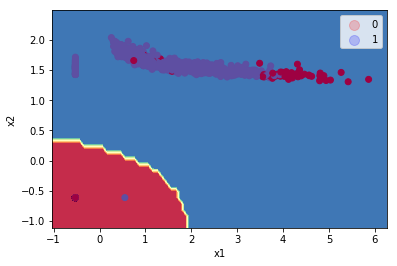

In [11]:
# Create RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(x_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# print feature importances in descending order
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],
                                   importances[indices[f]]))

# Extract top two features from our already scaled data.
x_train_2 = x_train[:, indices[0:2]]
x_val_2 = x_val[:, indices[0:2]]
x_test_2 = x_test[:, indices[0:2]]

# Perform Naive Bayes again.
# Initialize and train.
nb2 = GaussianNB()
# Train, predict, and score. Use the full training + validation set
# for training, and the testing dataset for testing.
# noinspection PyTypeChecker
cm_nb2, f1_nb2 = train_predict(model=nb2,
                               x_train=np.vstack((x_train_2, x_val_2)),
                               y_train=np.hstack((y_train, y_val)),
                               x_test=x_test_2,
                               y_test=y_test,
                               c_str='Naive Bayes, 2 Features')

# Plot the two most important features on a scatter.
df_2 = pd.DataFrame(dict(x1=x_val_2[:, 0], x2=x_val_2[:, 1], label=y_val))
colors = {1: 'blue', 0: 'red'}
fig, ax = plt.subplots()
grouped = df_2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', marker='o', s=100,
               alpha=0.2, label=key,
               color=colors[key])

# plt.show()

# Set min and max values and give it some padding
x_min, x_max = x_val_2[:, 0].min() - .5, x_val_2[:, 0].max() + .5
y_min, y_max = x_val_2[:, 1].min() - .5, x_val_2[:, 1].max() + .5
h = 0.1
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
z = nb2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# Plot the contour and test examples
# noinspection PyUnresolvedReferences
plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
# noinspection PyUnresolvedReferences
plt.scatter(x_val_2[:, 0], x_val_2[:, 1], c=y_val, cmap=plt.cm.Spectral)

plt.show()

## Obesrvations on plot above.
Note that while it appears the red region in the contour plot is bad, there are in fact many 0-labeled points stacked up on each other in that bottom-left red dot. 